## 1. Understanding Data

In [1]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### Before Start
본격적으로 시작하기 전에 데이터에 대해서 아주 약간만 깊이 있게 이해해보는 시간을 가져보려고 합니다.

### Q. 디스크의 CSV파일의 용량은 그렇게 높진 않은데 메모리로 읽기만 하면 몇 배로 늘어나는 이유는?
캐글을 하시다 보면 이런 경험이 한번쯤은 다들 있으실 것 같습니다.   
분명히 CSV 파일로는 1GB 보다 아래였는데 판다스로 read를 하면 2~3GB로 늘어나는 경우가 종종 있는데, 이유가 무엇일까요?

### Load data

In [33]:
PATH = '../input/kakr-4th-competition/'
train = pd.read_csv(PATH + 'train.csv')
test  = pd.read_csv(PATH + 'test.csv')

### 데이터 확인

* id
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)
    * \>50K : 1
    * <=50K : 0

In [6]:
train.sample(10) # 단일 데이터에 대해 확인, 갯수 지정 가능

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
3454,3454,46,Self-emp-inc,181413,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
12095,12095,36,Federal-gov,47310,Some-college,10,Divorced,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,>50K
6428,6428,26,Private,39092,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,4064,0,50,United-States,<=50K
8940,8940,30,Private,194901,Prof-school,15,Divorced,Sales,Own-child,White,Male,0,0,55,United-States,<=50K
16178,16178,30,Self-emp-not-inc,196342,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,25,United-States,<=50K
1055,1055,46,State-gov,102628,Masters,14,Widowed,Protective-serv,Unmarried,White,Male,0,0,40,United-States,<=50K
21054,21054,34,Self-emp-inc,154120,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4444,4444,61,?,188172,Doctorate,16,Widowed,?,Not-in-family,White,Female,0,0,5,United-States,<=50K
2626,2626,27,Private,155057,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,70,United-States,<=50K
15090,15090,51,Private,63424,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K


In [15]:
train.capital_gain.describe(percentiles=[.20, .40, .60, .80, ])

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
20%          0.00000
40%          0.00000
50%          0.00000
60%          0.00000
80%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [13]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

### Pandas 라이브러리
Pandas 라이브러리에서 많이 쓰이는 것들을 위주로 살펴보도록 하겠습니다.

loc, iloc, info, describe, value_counts, head, tail, sample, map, apply, groupby 등

In [24]:
train.iloc[:, 1]

0        40
1        17
2        18
3        21
4        24
         ..
26044    57
26045    23
26046    78
26047    26
26048    20
Name: age, Length: 26049, dtype: int64

In [34]:
train.income = train.income.map(lambda x : int(x=='>50K')) # True/False 값을 int로 변형해서 저장

train['income']

0        1
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int64

In [38]:
train.apply(lambda x : x['age'] + x['hours_per_week'], axis=1)

0        100
1         37
2         34
3         46
4         44
        ... 
26044    109
26045     63
26046     93
26047     66
26048     50
Length: 26049, dtype: int64

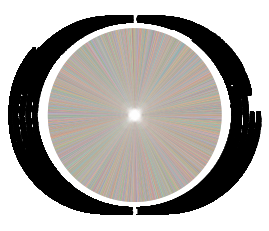

In [39]:
train.income.plot(kind='kde')

In [ ]:
train.shape

In [ ]:
train.apply(lambda x: x['age'] + x['hours_per_week'], axis=1)

In [ ]:
## 판다스 사용 팁
train.describe()

In [ ]:
train.capital_gain < 99999

In [ ]:
train

In [ ]:
train.income = train.income.map(lambda x: int(x=='>50K'))

In [ ]:
train.age.plot(kind='box')

## 2. Data Preprocessing

### 2.1 결측치 처리

In [ ]:
train[train.apply(lambda x: "?" in list(x), axis=1)]

In [ ]:
train.occupation.value_counts()

In [ ]:
train.workclass.value_counts()

### 결측치 처리
삭제? 대치?

In [ ]:
train[(train['workclass'] == '?')&(train['occupation'] == '?')]

In [ ]:
train.loc[(train.age >= 30)&(train.workclass=='?'), 'workclass'] = 'No'

In [ ]:
train.workclass.value_counts()

In [ ]:
train.native_country.value_counts()

### Null check 관련 팁
데이터를 일일이 다 확인하지 않고 결측치가 있는지 확인하는 방법은?

In [ ]:
train.info()

### 2.2 이상치 처리
수치형 데이터에 이상한 값이 없는지 한번 확인해보도록 하겠습니다.

In [ ]:
train.describe()

In [ ]:
train.loc[train.capital_gain < 99999].sort_values('capital_gain', ascending=False)

### log 표현

In [ ]:
train["log_capital_gain"] = train.capital_gain.map(lambda x: np.log(x, where=(x!=0)))

In [ ]:
train[['capital_gain', 'log_capital_gain']].describe()

In [ ]:
train.capital_gain.map(lambda x: np.log(x, where=(x!=0))).describe()

### 2.3 Scaling

Min-max Scaler: 
범위가 정해진 값이 필요할 때  
아웃라이어에 민감함
  
Standard Scaler: 
평균을 0, 표준편차를 1로 맞추어 정규분포의 특성을 가지도록 만듦  
아웃라이어에 영향을 덜 받음

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [ ]:
train['MM_fnlwgt'] = mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['MM_fnlwgt'] = mm_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['MM_age'] = mm_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['MM_age'] = mm_scaler.transform(test['age'].values.reshape(-1,1))

train['ST_fnlwgt'] = st_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['ST_fnlwgt'] = st_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['ST_age'] = st_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['ST_age'] = st_scaler.transform(test['age'].values.reshape(-1,1))

In [ ]:
train.describe()[['MM_fnlwgt', 'MM_age']]

In [ ]:
train.describe()[['ST_fnlwgt', 'ST_age']].round(6)

## 3. Feature Engineering

### 3.1 변수의 종류
변수 종류에 따라서 어떤 차이점이 있는지 살펴봅시다.

In [ ]:
train

### 3.2 인코딩
알고리즘이 이해하기 어려운 Feature들을 어떻게 처리할 지 알아봅시다

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
train

### Onehot encoder

In [ ]:
oe = OneHotEncoder()
oe_result = oe.fit_transform(train['workclass'].values.reshape(-1, 1))

In [ ]:
oe.get_feature_names(['workclass'])

In [ ]:
oe_result

In [ ]:
sub = pd.DataFrame(data=oe_result.toarray(), columns=oe.get_feature_names(['workclass']))

In [ ]:
pd.concat([train, sub], axis=1)

### Label encoder

In [ ]:
le = LabelEncoder()
le.fit_transform(train['workclass'].values.reshape(-1, 1))

In [ ]:
workclass_to_num = dict(zip(train['workclass'].unique(), [0,1,2,3,4,5,6,7,8,9]))

In [ ]:
train['workclass'].map(workclass_to_num)

In [ ]:
train['workclass'].unique()

사이킷런 인코딩은 불편한점이 너무 많아서.. 직접 만드는 게 나을 수도 있습니다.

### (Target) Mean Encoding

In [ ]:
train

In [ ]:
male_positive = train.loc[train['sex']=='Male', "income"]
female_positive = train.loc[train['sex']=='Female', "income"]

In [ ]:
(male_positive.value_counts() / male_positive.shape[0]).iloc[1]

In [ ]:
female_positive.value_counts() / female_positive.shape[0]

### onehot 인코딩 일괄적으로 하는 간단한 방법~

In [ ]:
dummied = pd.get_dummies(train)

In [ ]:
dummied

### 3.3 PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60, svd_solver='full')

In [ ]:
dummied = dummied.drop(columns=['id', 'income_<=50K', 'income_>50K'])

In [ ]:
X_train_std = st_scaler.fit_transform(dummied)

In [ ]:
X_train_std = st_scaler.fit_transform(dummied)
X_train_pca = pca.fit_transform(X_train_std)

In [ ]:
X_train_pca.shape

In [ ]:
X_train_2.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
X_train_2 = X_train_std - X_train_std.mean(axis=0)

res = np.dot(X_train_2, pca.components_.T)
res

In [ ]:
np.allclose(X_train_pca, res)

## 4. Before Modeling
시간이 남는다면..